# Imports

In [1]:
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Config
sns.set_theme(style="darkgrid")
sns.set()

pd.options.mode.chained_assignment = None 

# Read data

In [2]:
df = pd.read_csv("../data/justjoin_offers.csv")

In [3]:
df.head()

,title,street,city,country_code,address_text,marker_icon,workplace_type,company_name,company_url,company_size,...,company_logo_url,skills,remote,contract_type,salary_min,salary_max,currency,num_technology,technology,levels
0,Xamarin Developer with Node.js,Centrum,Londyn,GB,"Centrum, Londyn",mobile,remote,BeneTalk,https://www.benetalk.com/,11-50,...,https://bucket.justjoin.it/offers/company_logo...,"[{'name': 'Xamarin', 'level': 3}, {'name': 'Az...",True,b2b,2500.0,5000.0,gbp,3,"['Xamarin', 'Azure', 'Node.js']","[3, 3, 3]"
1,NOC - Site Reliability Engineer,Krupnicza 5/1,Kraków,PL,"Krupnicza 5/1, Kraków",python,remote,Inuits,https://inuits.eu/,25-40,...,https://bucket.justjoin.it/offers/company_logo...,"[{'name': 'AWS', 'level': 4}, {'name': 'C', 'l...",True,b2b,17000.0,21500.0,pln,3,"['AWS', 'C', 'Python']","[4, 4, 4]"
2,Młodszy Tester Automatyzujący,Chłodna 51,Warszawa,PL,"Chłodna 51, Warszawa",testing,remote,Altkom Software & Consulting,https://altkomsoftware.pl/,200,...,https://bucket.justjoin.it/offers/company_logo...,"[{'name': 'SQL', 'level': 2}, {'name': 'Seleni...",True,b2b,4900.0,6000.0,pln,3,"['SQL', 'Selenium WebDriver', 'Java']","[2, 2, 2]"
3,Machine Learning Engineer (NLP),Okrzei 1A,Warszawa,PL,"Okrzei 1A, Warszawa",python,remote,Sigmoidal,https://sigmoidal.io/,18-25,...,https://bucket.justjoin.it/offers/company_logo...,"[{'name': 'Google BERT', 'level': 4}, {'name':...",True,b2b,15000.0,20000.0,pln,3,"['Google BERT', 'Machine Learning', 'NLP']","[4, 4, 4]"
4,Senior Frontend Developer,Fabryczna 6,Wrocław,PL,"Fabryczna 6, Wrocław",javascript,remote,Nexer Group,https://www.nexergroup.com/,70 +,...,https://bucket.justjoin.it/offers/company_logo...,"[{'name': 'TypeScript', 'level': 4}, {'name': ...",True,b2b,19300.0,21800.0,pln,3,"['TypeScript', 'React', 'JavaScript']","[4, 4, 4]"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3926 entries, 0 to 3925
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             3926 non-null   object 
 1   street            3915 non-null   object 
 2   city              3926 non-null   object 
 3   country_code      3926 non-null   object 
 4   address_text      3926 non-null   object 
 5   marker_icon       3926 non-null   object 
 6   workplace_type    3926 non-null   object 
 7   company_name      3926 non-null   object 
 8   company_url       3926 non-null   object 
 9   company_size      3926 non-null   object 
 10  experience_level  3926 non-null   object 
 11  latitude          3926 non-null   float64
 12  longitude         3926 non-null   float64
 13  published_at      3926 non-null   object 
 14  remote_interview  3926 non-null   bool   
 15  id                3926 non-null   object 
 16  employment_types  3926 non-null   object 


# Salary Target

In [5]:
# Drop NaN values
df['salary_min'].isna().sum()
df = df.dropna()

# City

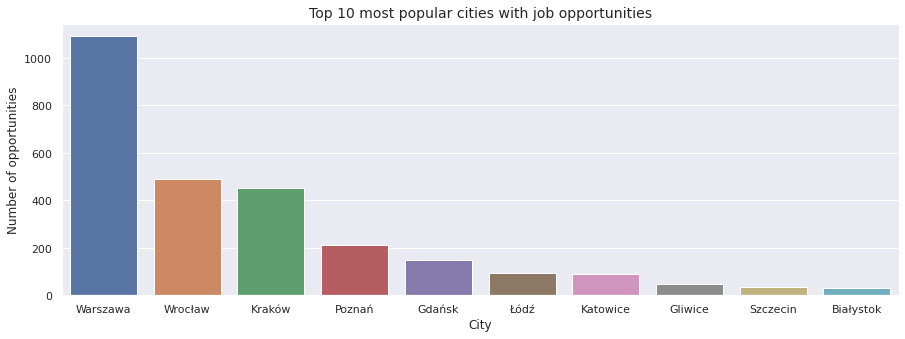

In [6]:
# Get first ten cities from column 'city'
city = df['city'].value_counts()[:10]

# Plotting a bar graph
plt.figure(figsize=(15,5))
sns.barplot(x=city.index, y=city.values)

# Simple config
plt.title("Top 10 most popular cities with job opportunities", fontsize=14)
plt.ylabel("Number of opportunities")
plt.xlabel("City")
plt.show()

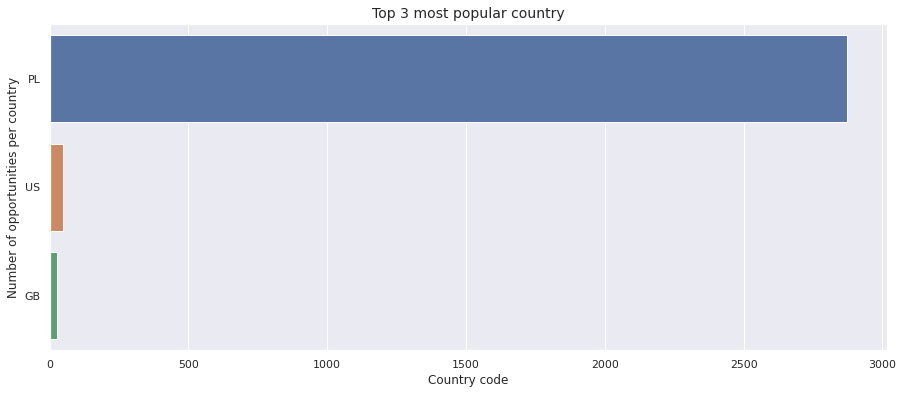

In [7]:
# Top 3 countries
countries = df['country_code'].value_counts()[:3]

# Plotting a bar graph
plt.figure(figsize=(15,6))
sns.barplot(y=countries.index, x=countries.values, orient="h")

# Simple config
plt.title("Top 3 most popular country", fontsize=14)
plt.ylabel("Number of opportunities per country")
plt.xlabel("Country code")
plt.show()

I will be working only on data from Poland, so let's remove other countries

In [8]:
print("Before:", df.shape)
df = df.loc[df['country_code'] == "PL"]
print("After:", df.shape)

Before: (3024, 27)
After: (2872, 27)


# Technologies

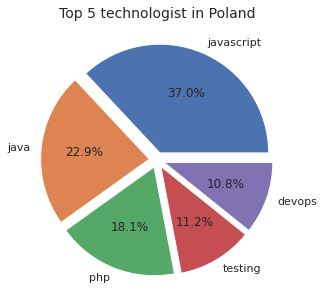

In [9]:
technologies = df['marker_icon'].value_counts()[:5]

plt.figure(figsize=(10,5))
plt.pie(x=technologies.values, labels=technologies.index, explode=[0.07]*5, autopct="%.1f%%")
plt.title("Top 5 technologist in Poland", fontsize=14)
plt.show()

# Workplace vs. COVID-19

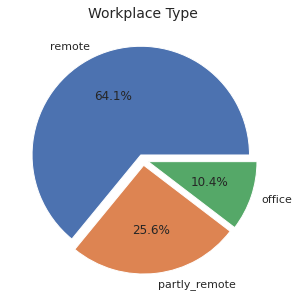

In [10]:
df_workplace = df['workplace_type'].value_counts()

plt.figure(figsize=(10,5))
plt.pie(x=df_workplace.values, labels=df_workplace.index, explode=[0.05]*3, autopct="%.1f%%")
plt.title("Workplace Type", fontsize=14)
plt.show()

# Company size

In [11]:
df['company_size']

1         25-40
2           200
3         18-25
4          70 +
5        80-100
         ...   
3920      20-30
3921    30 - 40
3922      15-20
3924         17
3925         10
Name: company_size, Length: 2872, dtype: object

In [12]:
# Custom function for data cleaning

def clear_data(x):
    x = x.split('-')[0]
    x = re.sub('[-+<>,.]', '', x)
    x = x.replace(' ', '')
    if x == '':
        x = x.replace('', '0')
    x = int(x)
    return x

In [13]:
df['company_size'] = df['company_size'].apply(lambda x: clear_data(x))

In [14]:
df['company_size_bin'] = pd.cut(df['company_size'],
                                bins=[0,30,500,1000,100000],
                                labels=["very_small", "small","medium", 'large'])

In [15]:
# Check results
df[['company_size', 'company_size_bin']]

,company_size,company_size_bin
1,25,very_small
2,200,small
3,18,very_small
4,70,small
5,80,small
...,...,...
3920,20,very_small
3921,30,very_small
3922,15,very_small
3924,17,very_small


# Experience Level

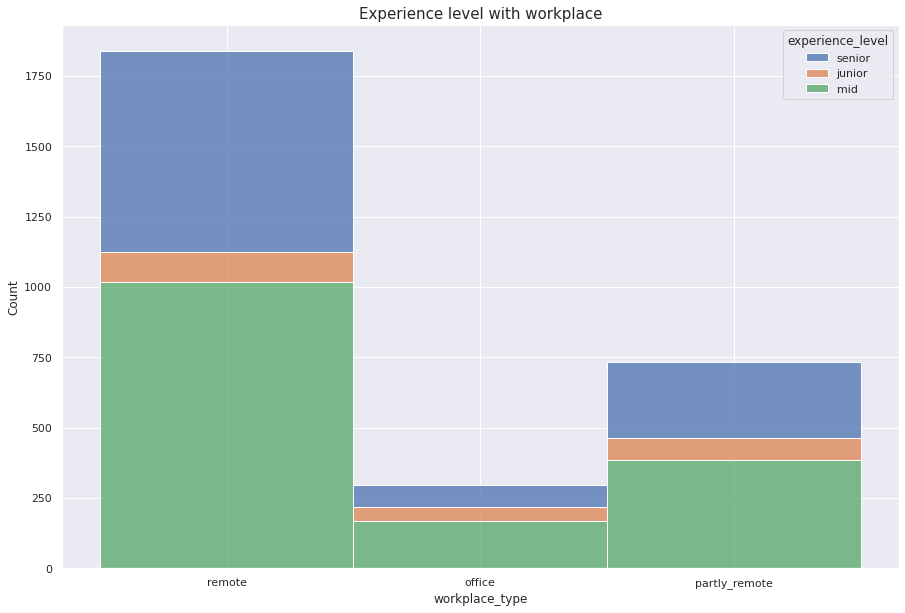

In [16]:
plt.figure(figsize=(15,10))

sns.histplot(
    df,
    x="workplace_type", hue="experience_level",
    multiple="stack",
);

plt.title("Experience level with workplace", fontsize=15.0);

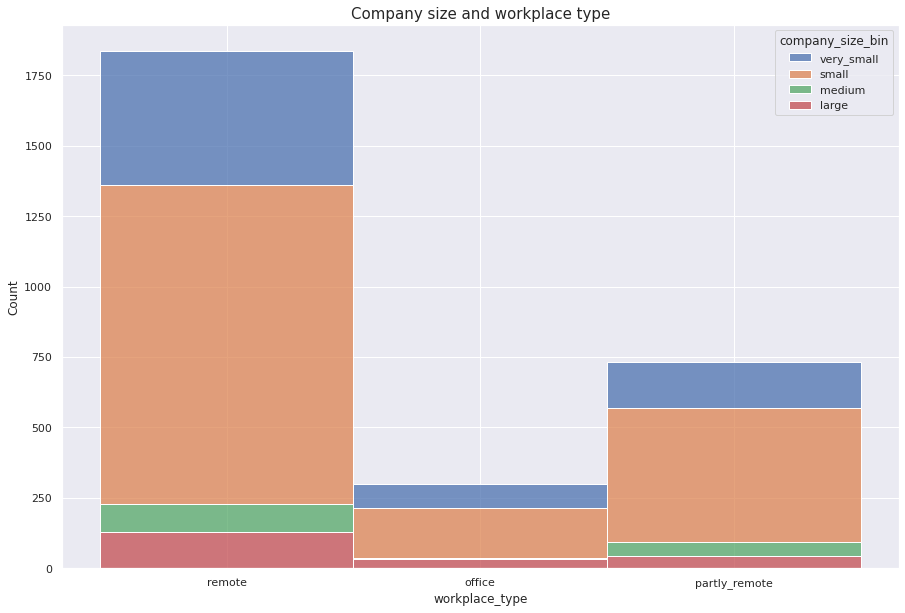

In [17]:
plt.figure(figsize=(15,10))

sns.histplot(
    df,
    x="workplace_type", hue="company_size_bin",
    multiple="stack",
);

plt.title("Company size and workplace type", fontsize=15.0);

# Salary (Target)

In [18]:
df['salary_mean'] = df[['salary_min', 'salary_max']].mean(axis=1)

### Convert to EUR, USD to PLN

In [19]:
df['currency'].value_counts()

pln    2845
eur      16
usd      10
gbp       1
Name: currency, dtype: int64

In [20]:
 currency = {"usd": 3.90,
            "eur": 4.60,
            "gbp": 5.40,
            "chf": 4.20,
            "pln" : 1.0
           }

In [21]:
df = df.replace({"currency": currency})

In [22]:
df['salary_mean'] = df['salary_mean'] * df['currency']

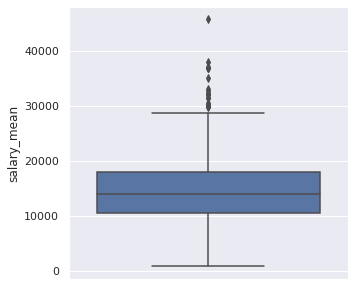

In [23]:
plt.figure(figsize=(5,5))
sns.boxplot(y=df['salary_mean']);

In [24]:
df['salary_mean'].describe()

count     2872.000000
mean     14283.336247
std       5211.371041
min        875.000000
25%      10500.000000
50%      14000.000000
75%      18000.000000
max      45702.000000
Name: salary_mean, dtype: float64

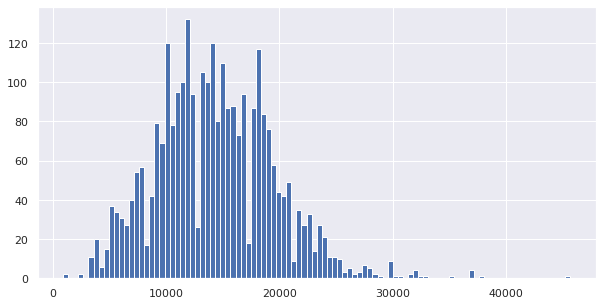

In [25]:
plt.figure(figsize=(10,5))
df['salary_mean'].hist(bins=100);

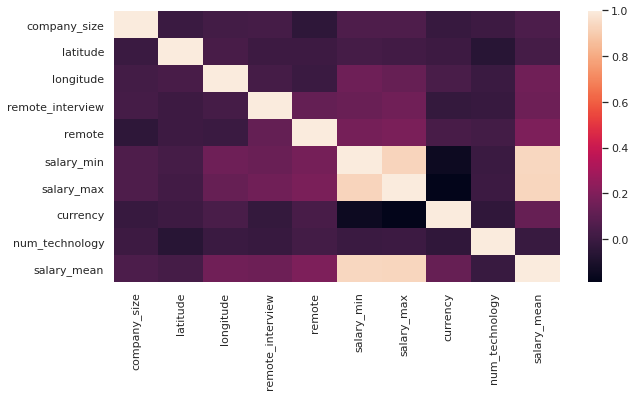

In [26]:
plt.figure(figsize=(10,5))
df_corr = df.corr()
sns.heatmap(data=df_corr);

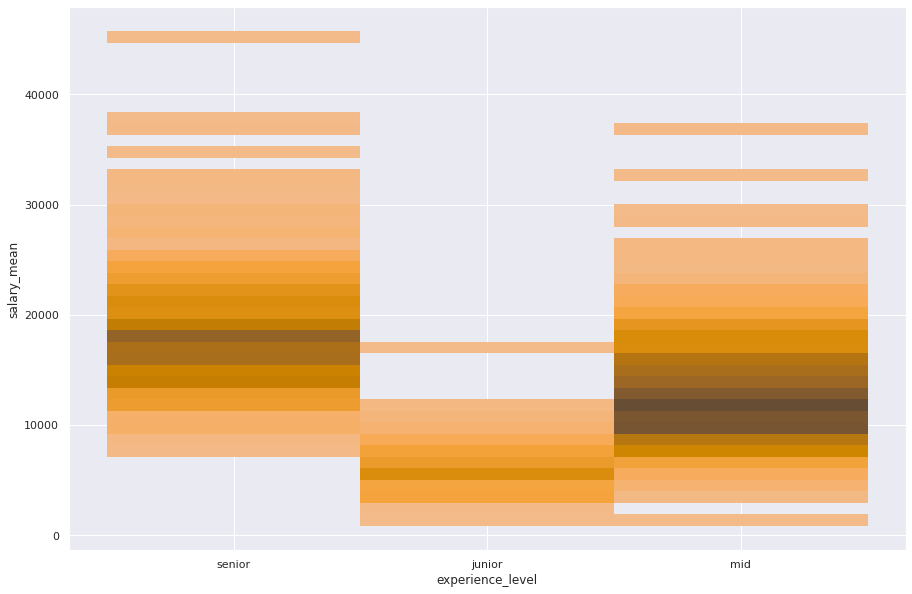

In [27]:
plt.figure(figsize=(15,10))
sns.histplot(data=df, x='experience_level', y='salary_mean', color="orange");

# Create numerical data

In [28]:
df.head()

,title,street,city,country_code,address_text,marker_icon,workplace_type,company_name,company_url,company_size,...,remote,contract_type,salary_min,salary_max,currency,num_technology,technology,levels,company_size_bin,salary_mean
1,NOC - Site Reliability Engineer,Krupnicza 5/1,Kraków,PL,"Krupnicza 5/1, Kraków",python,remote,Inuits,https://inuits.eu/,25,...,True,b2b,17000.0,21500.0,1.0,3,"['AWS', 'C', 'Python']","[4, 4, 4]",very_small,19250.0
2,Młodszy Tester Automatyzujący,Chłodna 51,Warszawa,PL,"Chłodna 51, Warszawa",testing,remote,Altkom Software & Consulting,https://altkomsoftware.pl/,200,...,True,b2b,4900.0,6000.0,1.0,3,"['SQL', 'Selenium WebDriver', 'Java']","[2, 2, 2]",small,5450.0
3,Machine Learning Engineer (NLP),Okrzei 1A,Warszawa,PL,"Okrzei 1A, Warszawa",python,remote,Sigmoidal,https://sigmoidal.io/,18,...,True,b2b,15000.0,20000.0,1.0,3,"['Google BERT', 'Machine Learning', 'NLP']","[4, 4, 4]",very_small,17500.0
4,Senior Frontend Developer,Fabryczna 6,Wrocław,PL,"Fabryczna 6, Wrocław",javascript,remote,Nexer Group,https://www.nexergroup.com/,70,...,True,b2b,19300.0,21800.0,1.0,3,"['TypeScript', 'React', 'JavaScript']","[4, 4, 4]",small,20550.0
5,PHP Developer,"Św. Antoniego 2/4, Brama C",Wrocław,PL,"Św. Antoniego 2/4, Brama C, Wrocław",php,remote,Piwik PRO,http://piwik.pro,80,...,True,b2b,7500.0,13000.0,1.0,3,"['Docker', 'MySQL', 'PHP']","[3, 3, 4]",small,10250.0


In [29]:
numerical_df = df[['city', 'marker_icon', 'salary_mean', 
                   'workplace_type', 'experience_level', 'contract_type', 'company_size_bin']]

In [30]:
# Export dataframe with 29 columns
df.to_csv("../data/full_df.csv", index=False)
numerical_df.to_csv("../data/model_df.csv", index=False)

In [31]:
numerical_df['city'] = numerical_df.loc[:, ('city')].astype('category')
numerical_df['city'] = numerical_df.loc[:, ('city')].cat.codes

numerical_df['marker_icon'] = numerical_df.loc[:, ('marker_icon')].astype('category')
numerical_df['marker_icon'] = numerical_df.loc[:, ('marker_icon')].cat.codes

numerical_df = pd.get_dummies(numerical_df, columns=['workplace_type', 'experience_level', 'contract_type', 'company_size_bin'], prefix="feature")

In [32]:
numerical_df.head()

,city,marker_icon,salary_mean,feature_office,feature_partly_remote,feature_remote,feature_junior,feature_mid,feature_senior,feature_b2b,feature_mandate_contract,feature_permanent,feature_very_small,feature_small,feature_medium,feature_large
1,12,17,19250.0,0,0,1,0,0,1,1,0,0,1,0,0,0
2,33,22,5450.0,0,0,1,1,0,0,1,0,0,0,1,0,0
3,33,17,17500.0,0,0,1,0,1,0,1,0,0,1,0,0,0
4,34,11,20550.0,0,0,1,0,0,1,1,0,0,0,1,0,0
5,34,15,10250.0,0,0,1,0,1,0,1,0,0,0,1,0,0


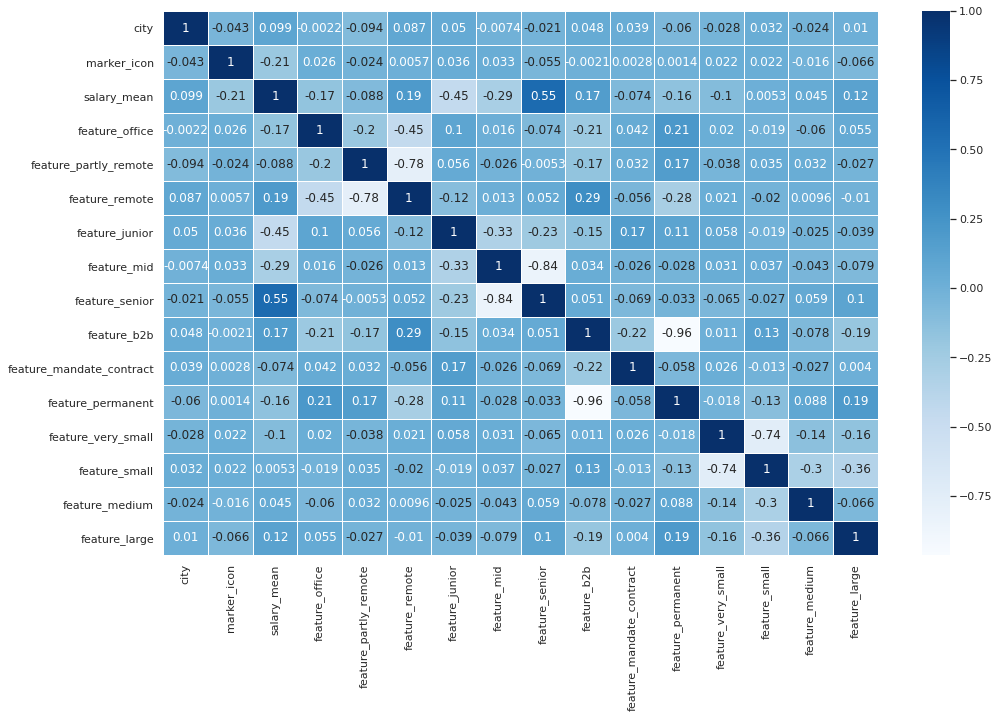

In [33]:
plt.figure(figsize=(16,10))
correlation = numerical_df.corr()
sns.heatmap(correlation, annot=True, linewidths=0.5, cmap="Blues");

In [34]:
numerical_df.to_csv("../data/numerical_df.csv", index=False)